In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures

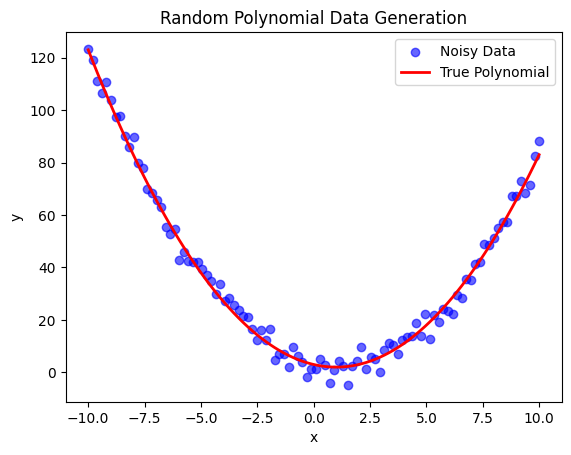

In [63]:
def generate_polynomial_data(
    coefficients, num_samples=100, x_range=(-10, 10), noise_std=5
):
    """
    Generates random polynomial data with Gaussian noise.

    Parameters:
        coefficients (list): Coefficients of the polynomial (highest degree first).
        num_samples (int): Number of data points to generate.
        x_range (tuple): Range of x values.
        noise_std (float): Standard deviation of Gaussian noise.

    Returns:
        tuple: x values, y values with noise
    """
    x = np.linspace(x_range[0], x_range[1], num_samples)
    y_true = np.polyval(coefficients, x)
    noise = np.random.normal(0, noise_std, num_samples)
    y_noisy = y_true + noise

    return x, y_noisy


# Example usage
coefficients = [1, -2, 3]  # Represents the polynomial x^2 - 2x + 3
x, y = generate_polynomial_data(coefficients, num_samples=100, noise_std=3)

# Plot the generated data
plt.scatter(x, y, label="Noisy Data", color="blue", alpha=0.6)
plt.plot(
    x, np.polyval(coefficients, x), label="True Polynomial", color="red", linewidth=2
)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Random Polynomial Data Generation")
plt.show()

In [64]:
df = pd.DataFrame({"x": x, "y": y})
lr_df = df.copy()

In [65]:
poly = PolynomialFeatures(degree=20)

In [66]:
x = poly.fit_transform(df[["x"]])

In [90]:
# df["x"] = x[:, 0]
# df["x^1"] = x[:, 1]
# df["x^2"] = x[:, 2]

In [68]:
df.head()

,x,y,x^1,x^2
0,1.0,123.337275,-10.000000,100.000000
1,1.0,119.008017,-9.797980,96.000408
2,1.0,111.133645,-9.595960,92.082441
3,1.0,106.652847,-9.393939,88.246097
4,1.0,110.898658,-9.191919,84.491378


In [69]:
new_order = ["x", "x^1", "x^2", "y"]
df = df[new_order]

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
# Splitting the data into training and testing sets
X = df.drop("y", axis=1)
y = df["y"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [72]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [91]:
model = lr.fit(x, y)

In [92]:
predictions = model.predict(x)

In [93]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [94]:
print("Mean Squared Error:", mean_squared_error(y_test, predictions))
print("R^2 Score:", r2_score(y_test, predictions))

ValueError: Found input variables with inconsistent numbers of samples: [20, 100]

In [77]:
print("Mean Absolute Error:", mean_absolute_error(y_test, predictions))

Mean Absolute Error: 2.9481517359843075


In [78]:
lr_model = LinearRegression()

In [79]:
# Splitting the data into training and testing sets
X = lr_df[["x"]]
y = lr_df["y"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [80]:
model2 = lr_model.fit(X_train, y_train)

In [81]:
model2_predictions = model2.predict(X_test)

In [82]:
print("Mean Squared Error:", mean_squared_error(y_test, model2_predictions))
print("R^2 Score:", r2_score(y_test, model2_predictions))

Mean Squared Error: 900.7696304434224
R^2 Score: 0.2600214476385686


In [83]:
print("Mean Absolute Error:", mean_absolute_error(y_test, model2_predictions))

Mean Absolute Error: 24.2094812104839


In [84]:
# When we are using the polynomial features, the model performs better
# than when we are using the linear features. This is because the polynomial
# features are able to capture the non-linear relationships between the
# features and the target variable, which the linear features are not able to
# capture. This allows the model to make more accurate predictions on the
# test data, resulting in a lower mean squared error, a higher R^2 score, and   a lower mean absolute error.

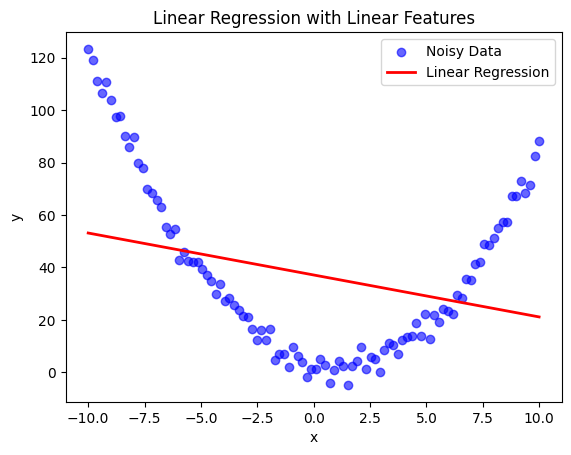

In [85]:
# plotting the polynomial regression model with polynomial features
plt.scatter(lr_df["x"], lr_df["y"], label="Noisy Data", color="blue", alpha=0.6)
plt.plot(
    lr_df["x"],
    model2.predict(lr_df[["x"]]),
    label="Linear Regression",
    color="red",
    linewidth=2,
)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Linear Regression with Linear Features")
plt.show()

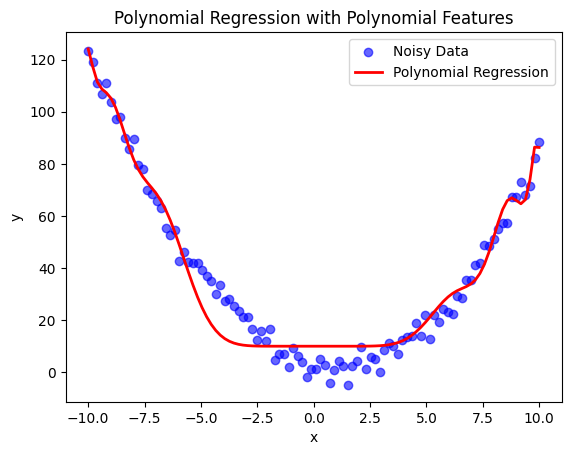

In [96]:
# PLotting the model with transformed polynomial features
plt.scatter(lr_df["x"], lr_df["y"], label="Noisy Data", color="blue", alpha=0.6)
plt.plot(
    lr_df["x"],
    model.predict(x),
    label="Polynomial Regression",
    color="red",
    linewidth=2,
)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Polynomial Regression with Polynomial Features")
plt.show()

In [97]:
weight, bias = model.coef_, model.intercept_

In [102]:
# As we are increasing the degree of the polynomial features, the model is
# able to capture more complex relationships between the features and the
# target variable. This allows the model to make more accurate predictions
# on the test data, resulting in a lower mean squared error, a higher R^2
# score, and a lower mean absolute error. However, increasing the degree of
# the polynomial features can also lead to overfitting, where the model
# learns the noise in the training data, resulting in poor generalization
# performance on the test data. Therefore, it is important to choose an
# appropriate degree for the polynomial features based on the complexity of
# the underlying relationship between the features and the target variable.
# This can be done using techniques such as cross-validation or regularization
# to prevent overfitting and improve the generalization performance of the model.

In [106]:
poly.n_output_features_

21

In [110]:
poly.get_feature_names_out()

array(['1', 'x', 'x^2', 'x^3', 'x^4', 'x^5', 'x^6', 'x^7', 'x^8', 'x^9',
       'x^10', 'x^11', 'x^12', 'x^13', 'x^14', 'x^15', 'x^16', 'x^17',
       'x^18', 'x^19', 'x^20'], dtype=object)

In [ ]:
poly.feature_names_in_

array(['x'], dtype=object)